#    **Loan-Approval-Prediction**

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution.It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Loading Dataset

In [ ]:
df=pd.read_csv('/content/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Rejected
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Approved
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Exploratoty Data ananlysis

In [ ]:
df.drop(['loan_id'],axis=1,inplace=True)

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Rejected
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Approved
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [ ]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.460108e+06,4.978238e+06,4.418928e+09,4.975076e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503428e+06,4.420757e+06,2.877368e+11,3.250745e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.400000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,4.000000e+07,1.880004e+13,1.470000e+07


In [ ]:
df.corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.006021,0.000948,0.013552,0.010721
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.634443,0.637981,0.016069,0.850160
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.591891,0.600275,0.025363,0.787526
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008577,-0.003952,-0.018503,0.016904
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.018703,-0.006643,-0.014999,-0.014841
residential_assets_value,0.006021,0.634443,0.591891,0.008577,-0.018703,1.000000,0.414995,0.010470,0.525898
commercial_assets_value,0.000948,0.637981,0.600275,-0.003952,-0.006643,0.414995,1.000000,0.030567,0.542024
luxury_assets_value,0.013552,0.016069,0.025363,-0.018503,-0.014999,0.010470,0.030567,1.000000,0.030753
bank_asset_value,0.010721,0.850160,0.787526,0.016904,-0.014841,0.525898,0.542024,0.030753,1.000000


In [ ]:
df.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

There is no null value in dataset

In [ ]:
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [ ]:
edu=LabelEncoder()
sl=LabelEncoder()
lo=LabelEncoder()
df[' education']=edu.fit_transform(df[' education'])
df[' self_employed']=sl.fit_transform(df[' self_employed'])
df[' loan_status']=lo.fit_transform(df[' loan_status'])

# **outliers**

In [ ]:
def detect_outliers_iqr_feature(data,feature):
  feature_data=data[feature]
  Q1=np.percentile(feature_data,25)
  Q3=np.percentile(feature_data,75)
  iqr=Q3-Q1
  lower_bound=Q1-1.5*iqr
  upperbound=Q3+1.5*iqr

  outliers=np.where((feature_data<lower_bound)|(feature_data>upperbound))[0]

In [ ]:
feature_name=[' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']
for i in feature_name:
  outliers=detect_outliers_iqr_feature(df,i)
  print("Outliers are present in",i,":",outliers)

Outliers are present in  no_of_dependents : None
Outliers are present in  income_annum : None
Outliers are present in  loan_amount : None
Outliers are present in  loan_term : None
Outliers are present in  cibil_score : None
Outliers are present in  residential_assets_value : None
Outliers are present in  commercial_assets_value : None
Outliers are present in  luxury_assets_value : None
Outliers are present in  bank_asset_value : None


# Data Visualization

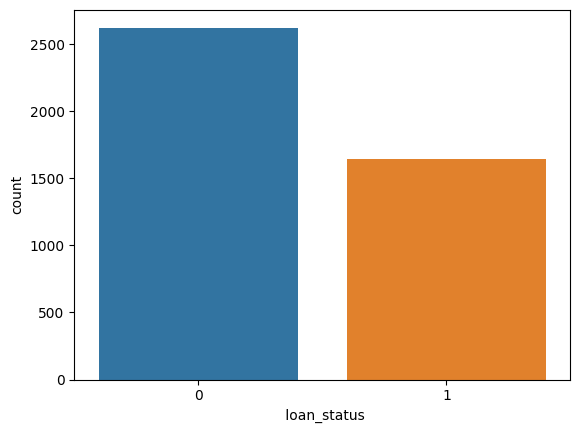

In [ ]:
sns.countplot(x=' loan_status',data=df)
plt.show()

# Scaling Data

In [ ]:
X = df.iloc[:,:-1]
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [ ]:
y = df.iloc[:,-1]
y

0       1
1       0
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
mm=MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

89.30523028883684
              precision    recall  f1-score   support

           0   0.925781  0.898862  0.912123       791
           1   0.844055  0.883673  0.863410       490

    accuracy                       0.893052      1281
   macro avg   0.884918  0.891268  0.887766      1281
weighted avg   0.894520  0.893052  0.893490      1281



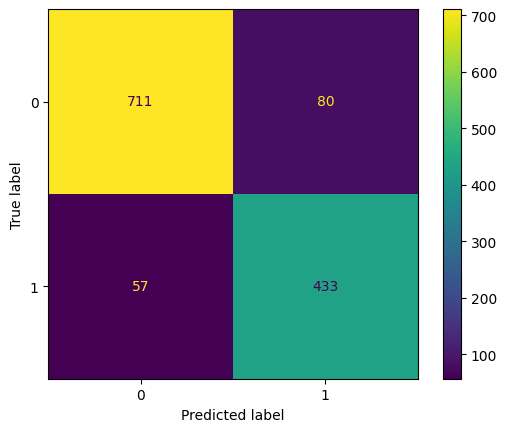

In [ ]:
# KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn)*100)
print(classification_report(y_test,y_pred_knn,digits=6))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

92.42779078844653
              precision    recall  f1-score   support

           0   0.962667  0.912769  0.937054       791
           1   0.870056  0.942857  0.904995       490

    accuracy                       0.924278      1281
   macro avg   0.916362  0.927813  0.921024      1281
weighted avg   0.927242  0.924278  0.924791      1281



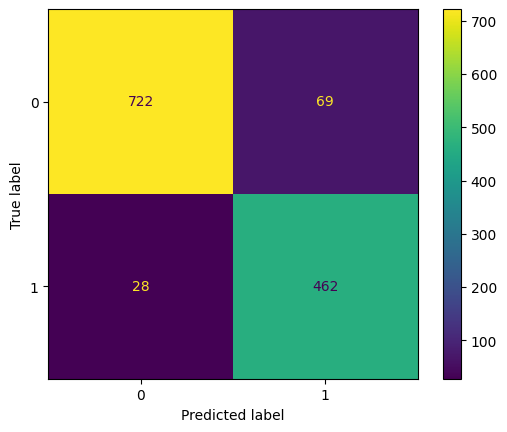

In [ ]:
# SVC
sv=SVC(kernel='poly')
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
print(accuracy_score(y_test,y_pred_sv)*100)
print(classification_report(y_test,y_pred_sv,digits=6))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

55.5815768930523
              precision    recall  f1-score   support

           0     0.9955    0.2819    0.4394       791
           1     0.4626    0.9980    0.6322       490

    accuracy                         0.5558      1281
   macro avg     0.7291    0.6399    0.5358      1281
weighted avg     0.7917    0.5558    0.5132      1281



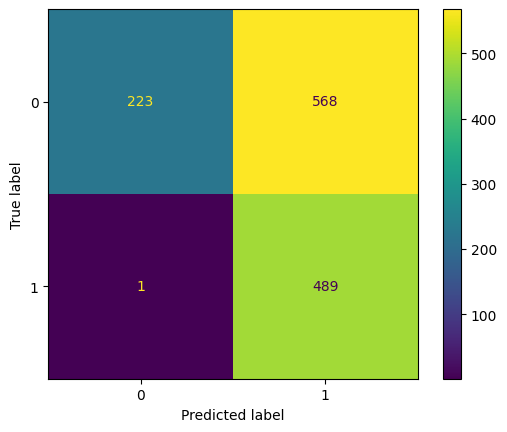

In [ ]:
# GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(accuracy_score(y_test,y_pred_nb)*100)
print(classification_report(y_test,y_pred_nb,digits=4 ))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))

96.17486338797814
              precision    recall  f1-score   support

           0    0.97686   0.96081   0.96877       791
           1    0.93837   0.96327   0.95065       490

    accuracy                        0.96175      1281
   macro avg    0.95762   0.96204   0.95971      1281
weighted avg    0.96214   0.96175   0.96184      1281



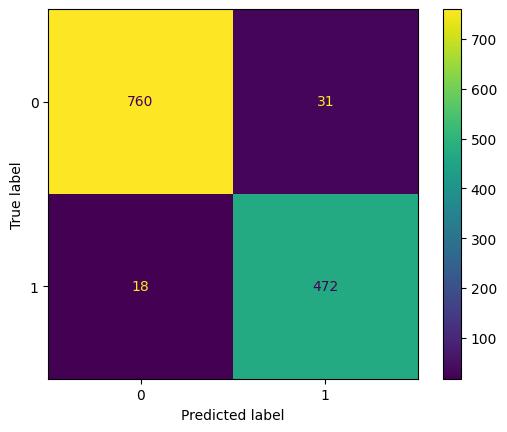

In [ ]:
# DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)
print(accuracy_score(y_test,y_pred_clf)*100)
print(classification_report(y_test,y_pred_clf,digits=5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_clf))

97.42388758782201
              precision    recall  f1-score   support

           0    0.97139   0.98736   0.97931       791
           1    0.97904   0.95306   0.96587       490

    accuracy                        0.97424      1281
   macro avg    0.97521   0.97021   0.97259      1281
weighted avg    0.97432   0.97424   0.97417      1281



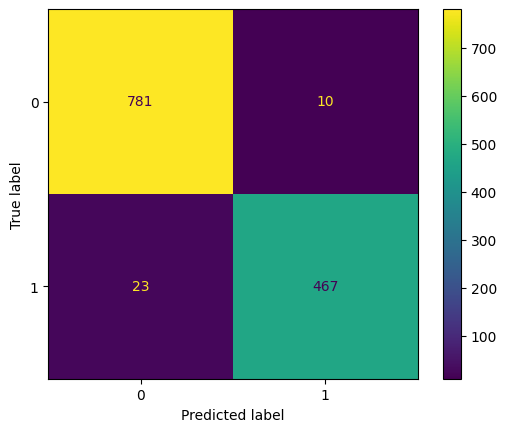

In [ ]:
# RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=1)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf)*100)
print(classification_report(y_test,y_pred_rf,digits=5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

95.23809523809523
              precision    recall  f1-score   support

           0    0.97650   0.94564   0.96082       791
           1    0.91650   0.96327   0.93930       490

    accuracy                        0.95238      1281
   macro avg    0.94650   0.95445   0.95006      1281
weighted avg    0.95355   0.95238   0.95259      1281



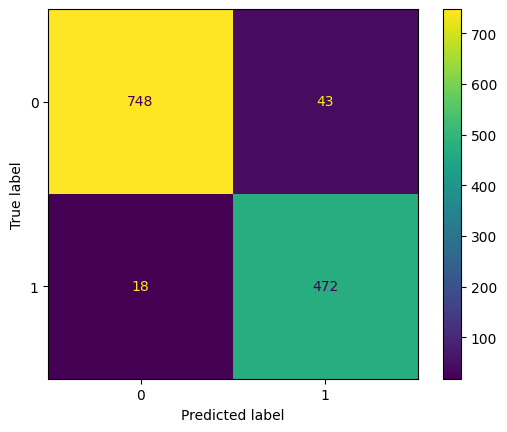

In [ ]:
# AdaBoostClassifier
ad=AdaBoostClassifier(random_state=1)
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
print(accuracy_score(y_test,y_pred_ad)*100)
print(classification_report(y_test,y_pred_ad,digits=5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))

97.42388758782201
              precision    recall  f1-score   support

           0    0.97139   0.98736   0.97931       791
           1    0.97904   0.95306   0.96587       490

    accuracy                        0.97424      1281
   macro avg    0.97521   0.97021   0.97259      1281
weighted avg    0.97432   0.97424   0.97417      1281



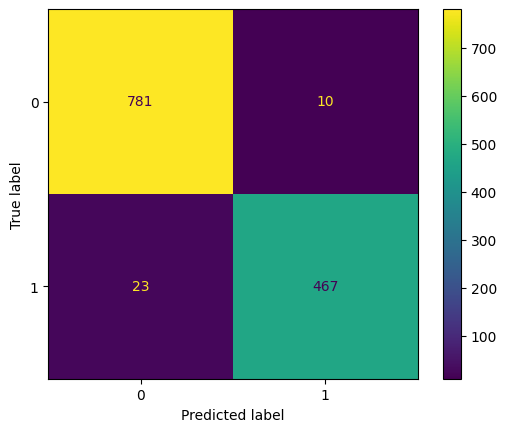

In [ ]:
# XGBClassifier
xb=XGBClassifier()
xb.fit(X_train,y_train)
y_pred_xb=xb.predict(X_test)
print(accuracy_score(y_test,y_pred_xb)*100)
print(classification_report(y_test,y_pred_xb,digits=5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xb))

In [ ]:
y.value_counts()

0    2623
1    1646
Name:  loan_status, dtype: int64

## over sampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y_os.value_counts()

1    2623
0    2623
Name:  loan_status, dtype: int64

In [ ]:
mm2=MinMaxScaler()
X_sc1=mm.fit_transform(X_os)
X_sc1

array([[4.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        4.40000000e-01, 1.19148685e-06, 5.44217687e-01],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.50000000e-02, 4.52126705e-07, 2.24489796e-01],
       [6.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.12500000e-01, 1.75531544e-06, 8.70748299e-01],
       ...,
       [2.00000000e-01, 1.00000000e+00, 0.00000000e+00, ...,
        5.23909500e-02, 4.36401259e-07, 1.55869184e-01],
       [2.00000000e-01, 0.00000000e+00, 1.00000000e+00, ...,
        1.26299000e-02, 2.33489188e-07, 1.58583605e-01],
       [2.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.39227300e-01, 1.10504607e-06, 3.73234354e-01]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sc1,y_os,test_size=0.3,random_state=1)

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=5)
sv_os=SVC(kernel='poly')
nb_os=GaussianNB()
clf_os=DecisionTreeClassifier(criterion='gini')
rf_os=RandomForestClassifier(n_estimators=50,random_state=1)
ab_os=AdaBoostClassifier(random_state=1)
xb_os=XGBClassifier()

In [ ]:
models=[knn_os,sv_os,nb_os,clf_os,rf_os,ab_os,xb_os]
for model in models:
  print('***',model,'***')
  model.fit(X_train,y_train)
  y_pred_model=model.predict(X_test)
  print(accuracy_score(y_test,y_pred_model)*100)
  print(classification_report(y_test,y_pred_model,digits=4))

*** KNeighborsClassifier() ***
90.40660736975858
              precision    recall  f1-score   support

           0     0.9434    0.8653    0.9026       809
           1     0.8690    0.9451    0.9054       765

    accuracy                         0.9041      1574
   macro avg     0.9062    0.9052    0.9040      1574
weighted avg     0.9072    0.9041    0.9040      1574

*** SVC(kernel='poly') ***
92.82083862770013
              precision    recall  f1-score   support

           0     0.9754    0.8826    0.9267       809
           1     0.8872    0.9765    0.9297       765

    accuracy                         0.9282      1574
   macro avg     0.9313    0.9295    0.9282      1574
weighted avg     0.9325    0.9282    0.9281      1574

*** GaussianNB() ***
93.71029224904701
              precision    recall  f1-score   support

           0     0.9810    0.8949    0.9360       809
           1     0.8983    0.9817    0.9382       765

    accuracy                         0.9371      

## **Hyper parameter tuning**

In [ ]:
clf1=DecisionTreeClassifier()
param1={'criterion':['gini','entropy'],'splitter':['best','random']}
hp_clf1=GridSearchCV(clf1,param1,cv=5,scoring='accuracy')
hp_clf1.fit(X_train,y_train)
hp_clf1.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [ ]:
rf1=RandomForestClassifier(random_state=1)
param2={'n_estimators':[40,50,60,70,80,]}
hp_rf1=GridSearchCV(rf1,param2,cv=5,scoring='accuracy')
hp_rf1.fit(X_train,y_train)
hp_rf1.best_params_

{'n_estimators': 70}

In [ ]:
ad1=AdaBoostClassifier(random_state=1)
param3={'n_estimators':[40,50,60,70,80],'algorithm':['SAMME', 'SAMME.R']}
hp_ad1=GridSearchCV(ad1,param3,cv=5,scoring='accuracy')
hp_ad1.fit(X_train,y_train)
hp_ad1.best_params_

{'algorithm': 'SAMME', 'n_estimators': 80}

In [ ]:
clf2=DecisionTreeClassifier(criterion='entropy',splitter='best')
rf2=RandomForestClassifier(n_estimators=70,random_state=1)
ad2=AdaBoostClassifier(algorithm='SAMME', n_estimators= 100)

In [ ]:
models=[clf2,rf2,ad2]
for model in models:
  print('***',model,'***')
  model.fit(X_train,y_train)
  y_pred2=model.predict(X_test)
  print(accuracy_score(y_test,y_pred2)*100)
  print(classification_report(y_test,y_pred2,digits=4))

*** DecisionTreeClassifier(criterion='entropy') ***
96.63278271918678
              precision    recall  f1-score   support

           0     0.9773    0.9567    0.9669       809
           1     0.9552    0.9765    0.9657       765

    accuracy                         0.9663      1574
   macro avg     0.9663    0.9666    0.9663      1574
weighted avg     0.9666    0.9663    0.9663      1574

*** RandomForestClassifier(n_estimators=70, random_state=1) ***
97.90343074968234
              precision    recall  f1-score   support

           0     0.9755    0.9839    0.9797       809
           1     0.9828    0.9739    0.9783       765

    accuracy                         0.9790      1574
   macro avg     0.9792    0.9789    0.9790      1574
weighted avg     0.9791    0.9790    0.9790      1574

*** AdaBoostClassifier(algorithm='SAMME', n_estimators=100) ***
95.93392630241424
              precision    recall  f1-score   support

           0     0.9794    0.9407    0.9596       809
   

## **feature extraction -pca**

In [ ]:
pca=PCA(n_components=10)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
rf2_pca=RandomForestClassifier(n_estimators=40,random_state=1)
rf2_pca.fit(X_train,y_train)
y_pred_rf2_pca=rf2_pca.predict(X_test)
print(accuracy_score(y_test,y_pred_rf2_pca)*100)
print(classification_report(y_test,y_pred_rf2_pca,digits=4))

95.80686149936467
              precision    recall  f1-score   support

           0     0.9685    0.9493    0.9588       809
           1     0.9475    0.9673    0.9573       765

    accuracy                         0.9581      1574
   macro avg     0.9580    0.9583    0.9581      1574
weighted avg     0.9583    0.9581    0.9581      1574



In [ ]:
clf2_pca=DecisionTreeClassifier(criterion='entropy',splitter='best')
clf2_pca.fit(X_train,y_train)
y_pred_clf2_pca=clf2_pca.predict(X_test)
print(accuracy_score(y_test,y_pred_clf2_pca)*100)
print(classification_report(y_test,y_pred_clf2_pca,digits=4))

93.58322744599747
              precision    recall  f1-score   support

           0     0.9492    0.9246    0.9368       809
           1     0.9224    0.9477    0.9349       765

    accuracy                         0.9358      1574
   macro avg     0.9358    0.9362    0.9358      1574
weighted avg     0.9362    0.9358    0.9358      1574



In [ ]:
ad2_pca=AdaBoostClassifier(algorithm='SAMME.R', n_estimators= 100)
ad2_pca.fit(X_train,y_train)
y_pred_ad2_pca=ad2_pca.predict(X_test)
print(accuracy_score(y_test,y_pred_ad2_pca)*100)
print(classification_report(y_test,y_pred_ad2_pca,digits=4))

93.26556543837357
              precision    recall  f1-score   support

           0     0.9535    0.9135    0.9331       809
           1     0.9124    0.9529    0.9322       765

    accuracy                         0.9327      1574
   macro avg     0.9330    0.9332    0.9327      1574
weighted avg     0.9335    0.9327    0.9327      1574



In [ ]:
pca.explained_variance_ratio_

array([0.25696742, 0.22981038, 0.19278761, 0.10537636, 0.08989992,
       0.07792775, 0.02544224, 0.01091512, 0.0069716 , 0.0039016 ])

# **feature selection**

In [ ]:
chi2_select=SelectKBest(chi2,k=10)
X_kbest=chi2_select.fit_transform(X_sc1,y_os)
X_kbest.shape

(5246, 10)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_kbest,y_os,test_size=0.3,random_state=1)

In [ ]:
clf2_chi=DecisionTreeClassifier(criterion='entropy',splitter='best')
clf2_chi.fit(X_train,y_train)
y_pred_clf2_chi=clf2_chi.predict(X_test)
print(accuracy_score(y_test,y_pred_clf2_chi)*100)
print(classification_report(y_test,y_pred_clf2_chi,digits=4))

97.20457433290979
              precision    recall  f1-score   support

           0     0.9775    0.9679    0.9727       809
           1     0.9664    0.9765    0.9714       765

    accuracy                         0.9720      1574
   macro avg     0.9719    0.9722    0.9720      1574
weighted avg     0.9721    0.9720    0.9720      1574



In [ ]:
#Random Forest Classifier
rf_chi=RandomForestClassifier(n_estimators=40,random_state=1)
rf_chi.fit(X_train,y_train)
y_pred_rf_chi=rf_chi.predict(X_test)
print(accuracy_score(y_test,y_pred_rf_chi)*100)
print(classification_report(y_test,y_pred_rf_chi,digits=4))

97.58576874205845
              precision    recall  f1-score   support

           0     0.9742    0.9790    0.9766       809
           1     0.9777    0.9725    0.9751       765

    accuracy                         0.9759      1574
   macro avg     0.9759    0.9758    0.9758      1574
weighted avg     0.9759    0.9759    0.9759      1574



In [ ]:
ad2_chi=AdaBoostClassifier(algorithm='SAMME.R', n_estimators= 100)
ad2_chi.fit(X_train,y_train)
y_pred_ad2_chi=ad2_chi.predict(X_test)
print(accuracy_score(y_test,y_pred_ad2_chi)*100)
print(classification_report(y_test,y_pred_ad2_chi,digits=4))

96.12452350698857
              precision    recall  f1-score   support

           0     0.9770    0.9468    0.9617       809
           1     0.9456    0.9765    0.9608       765

    accuracy                         0.9612      1574
   macro avg     0.9613    0.9617    0.9612      1574
weighted avg     0.9617    0.9612    0.9613      1574



In [ ]:
selected_features=chi2_select.fit_transform(X_sc1,y_os)
selected_feature_indices=chi2_select.get_support(indices=True)
print('Selected_feature_names:',X_os.columns[selected_feature_indices].tolist())

Selected_feature_names: [' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' luxury_assets_value', ' bank_asset_value']


# From the above observations it's clear that RandomForestClassifie and DecisionTreeClassifier shows the highest accuracy .

NEW PREDICTION


In [ ]:
data={' no_of_dependents':[0], ' education':["Not Graduate"], ' self_employed':["Yes"], ' income_annum':[4100000], ' loan_amount':[12200000], ' loan_term':[8], ' cibil_score':[417], ' residential_assets_value':[2700000],' commercial_assets_value':[2200000],' luxury_assets_value':[8800000], ' bank_asset_value':[3300000]}
df_pred=pd.DataFrame(data)
df_pred[' education'] = edu.fit_transform(df_pred[' education'])
df_pred[' self_employed'] = sl.fit_transform(df_pred[' self_employed'])


In [ ]:
y_new=rf2.predict(mm.transform(df_pred))5
rf2.predict(mm.transform(df_pred))
if y_new==1:
  print('REJECT')
else:
  print('APPROVED')

REJECT


In [ ]:
import pickle

In [ ]:
pickle.dump(rf2,open('/content/loan_model','wb'))


In [ ]:
pickle.dump(mm,open('/content/loan_scaler','wb'))

In [ ]:
model=pickle.load(open('/content/loan_model','rb'))

In [ ]:
scaler=pickle.load(open('/content/loan_scaler','rb'))